In [11]:
from fastai.vision import *

In [16]:
path = Path('Data/')

In [17]:
path.ls()

[PosixPath('Data/test'), PosixPath('Data/train')]

In [19]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train="train", valid="test",
        ds_tfms=get_transforms(), size=224, bs=64, num_workers=4).normalize(imagenet_stats)

In [20]:
data.classes

['car', 'human', 'noise']

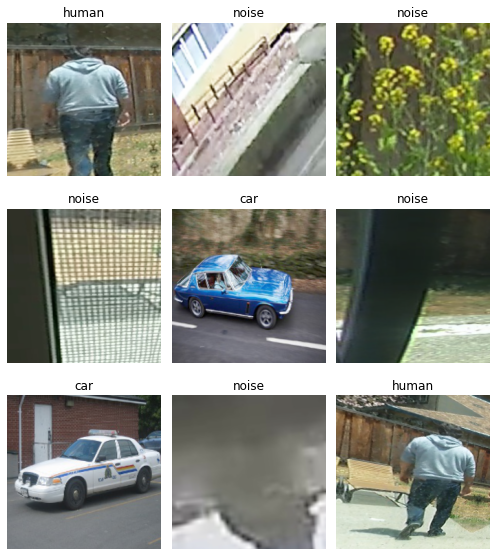

In [21]:
data.show_batch(rows=3, figsize=(7,8))

In [22]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['car', 'human', 'noise'], 3, 2709, 900)

In [23]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [24]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.273917,0.008430,0.998889,00:07
1,0.086884,0.008250,0.998889,00:07
2,0.037564,0.006225,0.998889,00:07
3,0.020473,0.006834,0.998889,00:08


In [25]:
learn.save('stage-1')

In [26]:
learn.unfreeze()

In [27]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


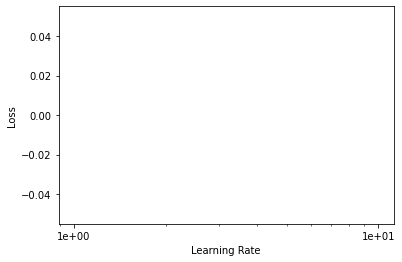

In [28]:
learn.recorder.plot()

In [29]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.014681,0.000444,1.000000,00:08
1,0.010960,0.005989,0.997778,00:09


In [30]:
learn.save('stage-2')

In [31]:
interp = ClassificationInterpretation.from_learner(learn)

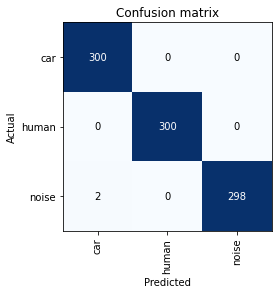

In [32]:
interp.plot_confusion_matrix()

In [33]:
from fastai.widgets import *

In [34]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [44]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

#learn_cln.load('stage-2');

In [51]:
learn_cln.fit_one_cycle(4)

In [52]:
learn_cln.save('stage-3')

In [53]:
learn.unfreeze()

In [54]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


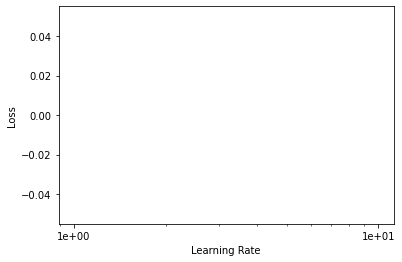

In [55]:
learn.recorder.plot()

In [58]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [59]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [48]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


In [49]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [67]:
 db = (ImageList.from_csv(path, 'cleaned.csv', folder='.')
                    .split_none()
                    .label_from_df()
                    .transform(get_transforms(), size=224)
                    .databunch()
      )

In [72]:
db = ImageDataBunch.from_csv('Data',csv_labels='cleaned.csv',label_col=1,valid_pct=0.2,ds_tfms=get_transforms(), size=224, num_workers=0).normalize(imagenet_stats)

In [74]:
db.classes, db.c, len(db.train_ds), len(db.valid_ds)

(['car', 'human', 'noise'], 3, 2820, 704)

In [76]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

In [78]:
learn_cln.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.242912,0.017045,0.002841,00:21
1,0.081348,0.021634,0.002841,00:23
2,0.038921,0.019441,0.002841,00:23
3,0.019143,0.019121,0.002841,00:22


In [79]:
learn_cln.save('stage-3')

In [80]:
learn_cln.unfreeze()

In [81]:
learn_cln.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Exception ignored in: <Finalize object, dead>
Traceback (most recent call last):
  File "/home/vadim/anaconda3/envs/fastaiV3/lib/python3.6/multiprocessing/util.py", line 186, in __call__
    res = self._callback(*self._args, **self._kwargs)
OSError: [Errno 9] Bad file descriptor
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f25092fc908>>
Traceback (most recent call last):
  File "/home/vadim/anaconda3/envs/fastaiV3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/home/vadim/anaconda3/envs/fastaiV3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 944, in _shutdown_workers
    q.close()
  File "/home/vadim/anaconda3/envs/fastaiV3/lib/python3.6/multiprocessing/queues.py", line 134, in close
    self._reader.close()
  File "/home/vadim/anaconda3/envs/fastaiV3/lib/python3.6/multiprocessing/connection.

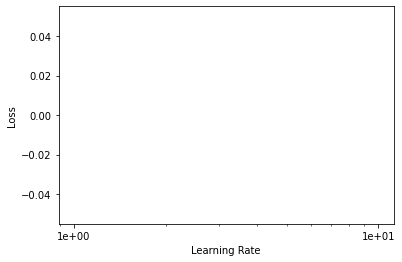

In [83]:
learn_cln.recorder.plot()

In [84]:
learn_cln.fit_one_cycle(5, max_lr=1e-5)

epoch,train_loss,valid_loss,error_rate,time


KeyboardInterrupt: 

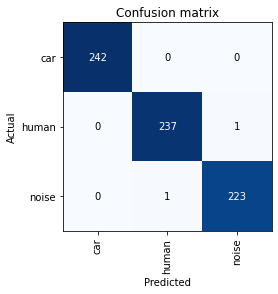

In [85]:
interp = ClassificationInterpretation.from_learner(learn_cln)
interp.plot_confusion_matrix()

In [86]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [87]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())